In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.interpolate

In [2]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg
import ecoevocrm.strain_pool

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

----

## Model parameters

### Traits

In [4]:
L = 3

In [5]:
sigma = utils.binary_combinations(L, exclude_all_zeros=True)
# sigma = sigma/sigma.sum(axis=1, keepdims=1)

### Costs

In [6]:
chi = 0.5

In [7]:
xi = 0.1

In [8]:
# J = utils.random_matrix((L, L), 'tikhonov_sigmoid', args={'n_star': 5, 'delta': 1}, triangular=True, diagonal=0)
# viz.matrix_plot(J, vmin=-0.4, vmax=0.4)

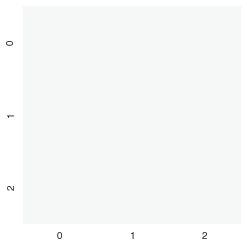

In [9]:
J = np.zeros(shape=(L,L))
# J[0,1] = 0.5
J[1,2] = -0.0
# J[0,2] = -0.9
# J[2,3] = -0.9
# J[2,3] = 0.9
viz.matrix_plot(J, vmin=-0.4, vmax=0.4, cmap='RdBu')

### Environment

In [10]:
T_total    = 1e3
T_envcycle = T_total/10

In [11]:
rho_0 = 1

In [12]:
# alpha = 0.1

# theta = (2*np.pi)/T_envcycle
# theta = np.random.normal(theta, theta*0.05, size=L)

# phi   = (T_envcycle/L)*np.array(range(L))
# phi   = phi + np.random.normal(0, 0.05*phi)

In [13]:
# rho_series, t_rho = utils.sinusoid_series(T=2*T_total, dt=1, L=L, amplitude=alpha, period=theta, phase=phi, shift=rho_0, return_interp=False)

In [14]:
# rho = scipy.interpolate.interp1d(t_rho, rho_series)

In [15]:
# fig, ax = plt.subplots(1, 1, figsize=(16, 4))
# for i in range(L):
#     ax.plot(t_rho[t_rho < T_total], rho_series[i, t_rho < T_total]) 
# ax.plot(t_rho[t_rho < T_total], rho_series[:, t_rho < T_total].sum(axis=0) - L, color='k')
# plt.show()

In [16]:
# stop

--------
#### Brownian

In [17]:
l   = 1e-3
k   = 1e-8
eps = 0 # 1e-8

In [18]:
rho_series, t_rho = utils.brownian_series(T=3*T_total, dt=1000, L=L, lamda=l, eta_mean=0, eta_std=eps, k=k, y0=rho_0, v0=0, return_interp=False)

In [19]:
rho = scipy.interpolate.interp1d(t_rho, rho_series)

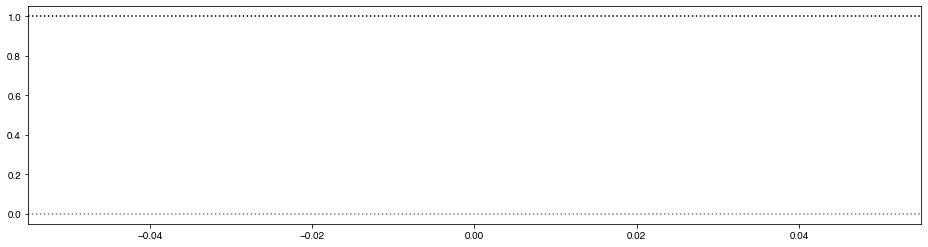

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
for i in range(L):
    ax.plot(t_rho[t_rho < T_total], rho_series[i, t_rho < T_total]) 
ax.plot(t_rho[t_rho < T_total], rho_series[:, t_rho < T_total].sum(axis=0) - L, color='k')
ax.axhline(rho_0, color='k', alpha=1, ls=':')
ax.axhline(0, color='k', alpha=0.5, ls=':')
plt.show()

## Simulate model

In [21]:
system = ConsumerResourceSystem(type_set=TypeSet(sigma=sigma[0], xi=xi, chi=chi, J=J, mu=1e-10,
                                                 normalize_phenotypes=False, binarize_traits_chi_cost_terms=True, binarize_traits_J_cost_terms=True), 
                                resource_set=ResourceSet(num_resources=L, rho=rho), 
                                N_init=1, R_init=1, convergent_lineages=True, threshold_min_rel_abundance=0)

In [22]:
system.run(T=T_total)

[ Mutation event occurred at  t=51.4613 1/1*(3)]	
[[0. 1. 1.]]
[ Mutation event occurred at  t=52.7392 2/2*(6)]	
[[1. 0. 1.]]
[ Mutation event occurred at  t=52.9322 3/3*(9)]	
[[0. 1. 1.]]
[ Mutation event occurred at  t=57.1985 3/3*(9)]	
[[1. 0. 1.]]
[ Mutation event occurred at  t=58.4708 3/3*(9)]	
[[0. 1. 1.]]
[ Mutation event occurred at  t=60.7370 3/3*(9)]	
[[0. 1. 1.]]
[ Mutation event occurred at  t=60.8156 3/3*(9)]	
[[0. 1. 1.]]
[ Mutation event occurred at  t=63.0657 3/3*(9)]	
[[1. 0. 1.]]
[ Mutation event occurred at  t=64.6623 3/3*(9)]	
[[1. 0. 1.]]
[ Mutation event occurred at  t=67.8529 3/3*(9)]	
[[0. 1. 1.]]
[ Mutation event occurred at  t=69.3532 3/3*(9)]	
[[1. 0. 1.]]
[ Mutation event occurred at  t=74.3253 3/3*(9)]	
[[1. 0. 1.]]
[ Mutation event occurred at  t=74.7340 3/3*(9)]	
[[1. 0. 1.]]
[ Mutation event occurred at  t=75.7334 3/3*(9)]	
[[0. 1. 1.]]
[ Mutation event occurred at  t=78.7912 3/3*(9)]	
[[1. 0. 1.]]
[ Mutation event occurred at  t=80.0838 3/3*(9)]	
[[0. 

<AxesSubplot:>

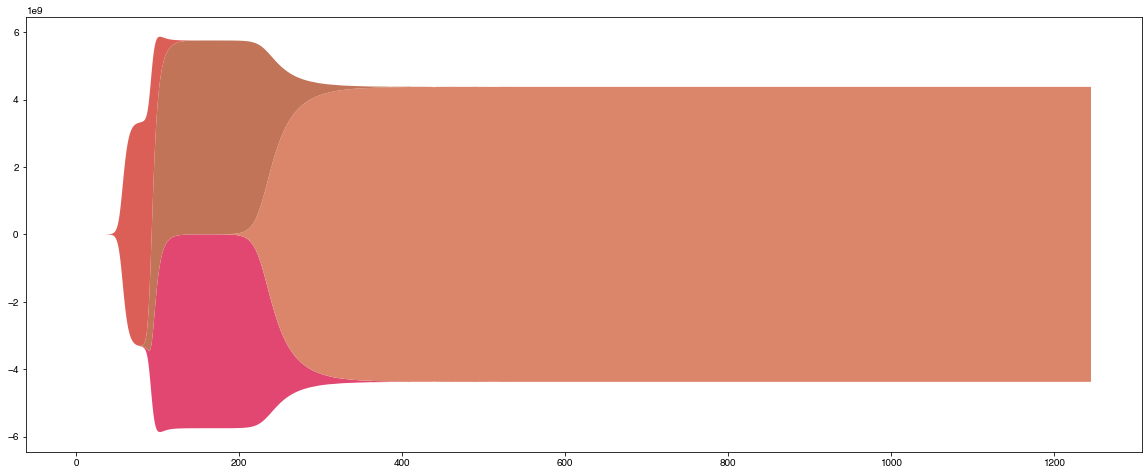

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(system, ax=ax, relative_abundance=False, apply_palette_depth=0, t_max=1e6, log_x_axis=False)

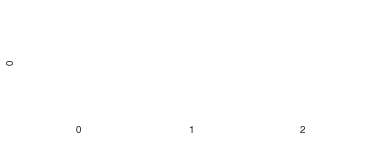

In [24]:
viz.matrix_plot(system.extant_type_set.sigma)

In [25]:
# stop

---------
---------

In [26]:
fitness_series = np.vstack([system.get_fitness(t=t) for t in system.t_series]).T


In [27]:
# fitness_series = fitness_series * (system.N_series > 0)

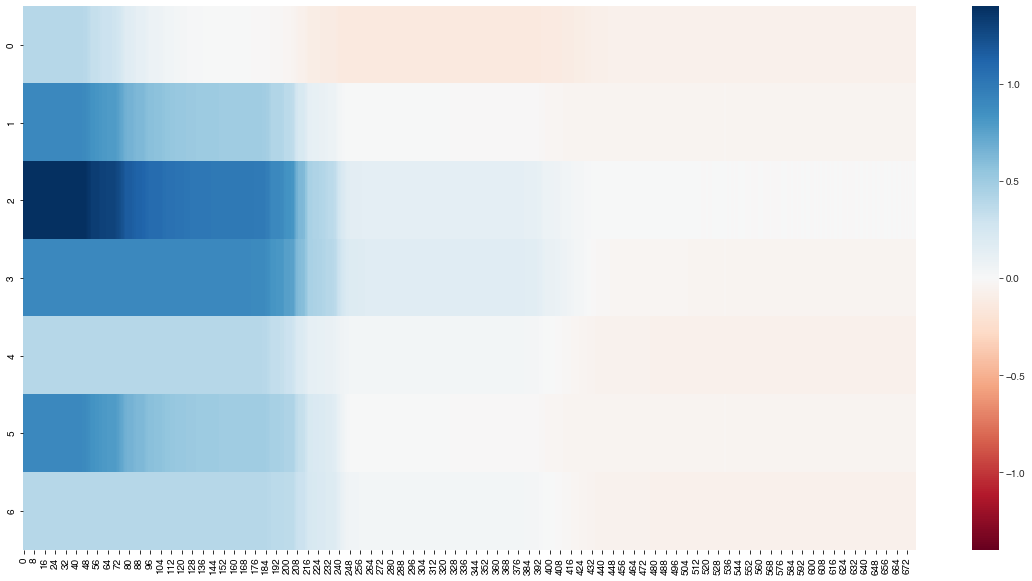

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
viz.matrix_plot(fitness_series, ax=ax, square=False)

In [29]:
selcoeff_series = (fitness_series - fitness_series.mean(axis=0)[np.newaxis, :]) # * (system.N_series > 0)

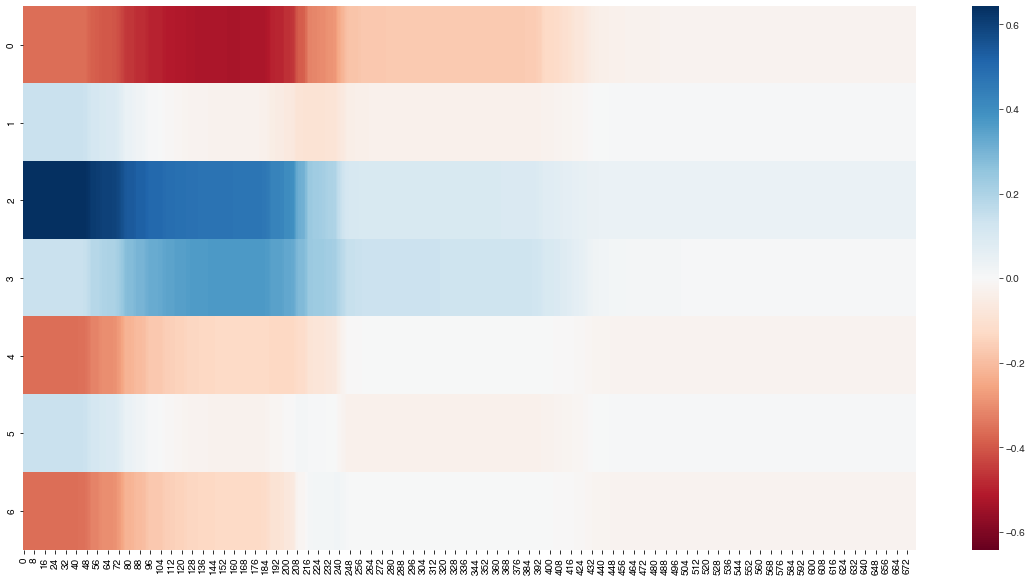

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
viz.matrix_plot(selcoeff_series, ax=ax, square=False)

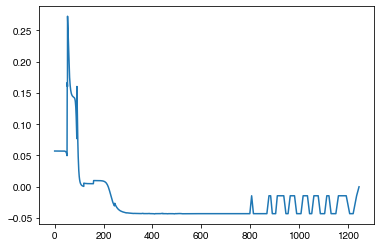

In [31]:
plt.plot(system.t_series, (fitness_series * (system.N_series > 0)).mean(axis=0))

<ipython-input-32-61e1e2b02a9b>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1)


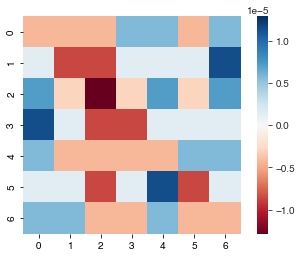

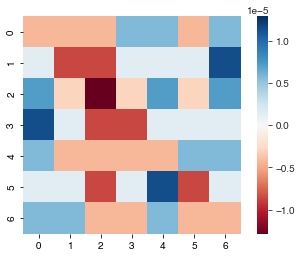

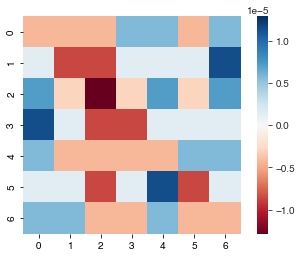

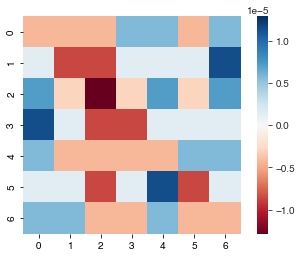

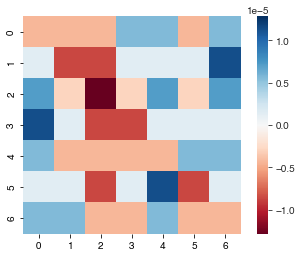

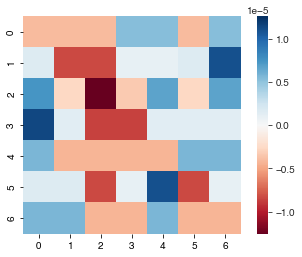

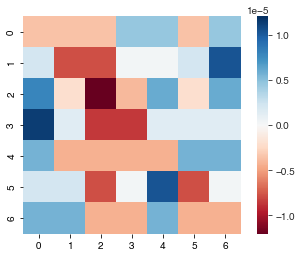

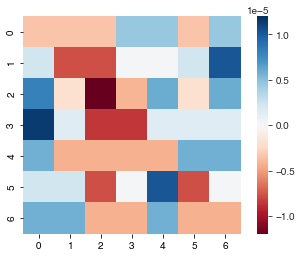

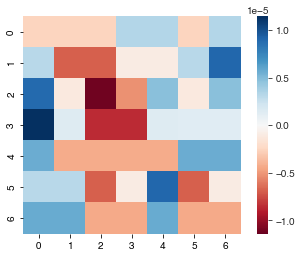

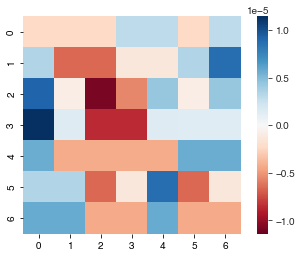

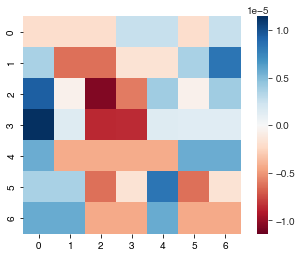

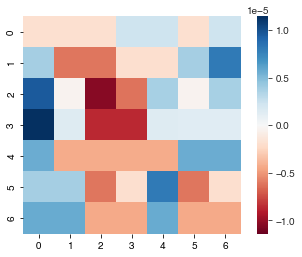

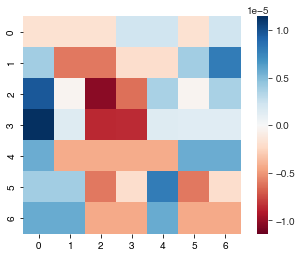

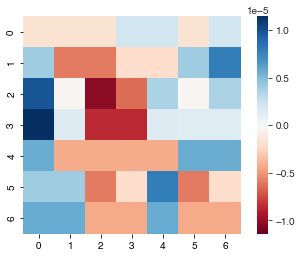

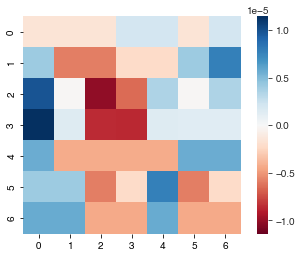

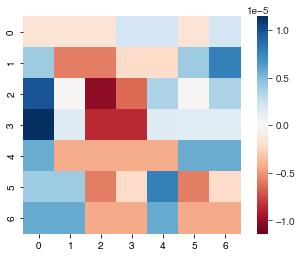

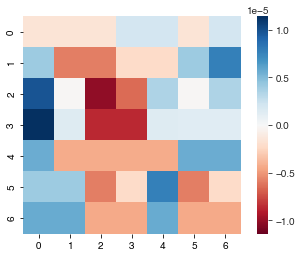

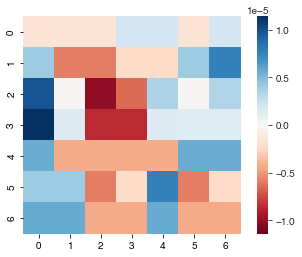

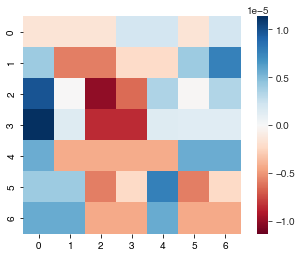

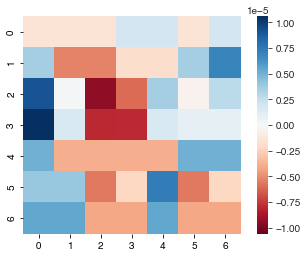

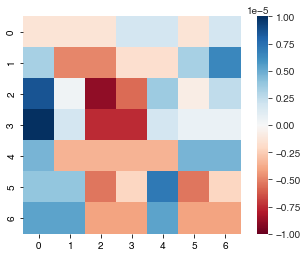

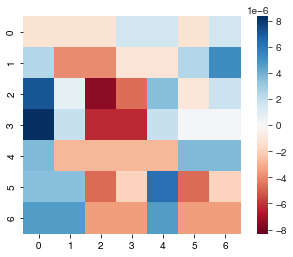

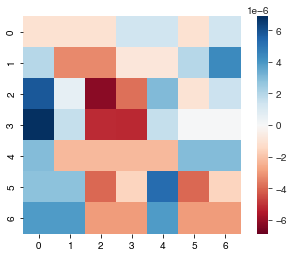

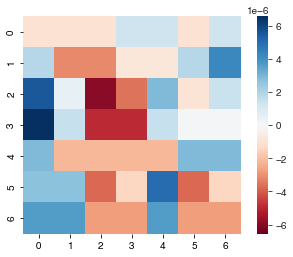

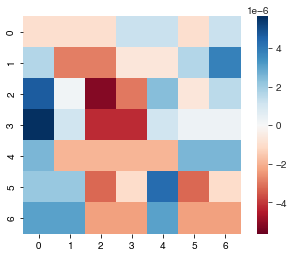

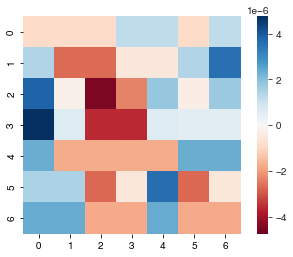

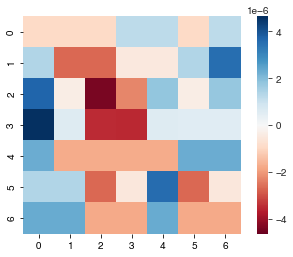

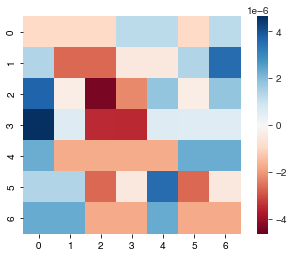

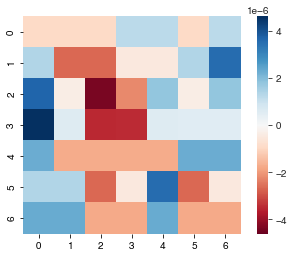

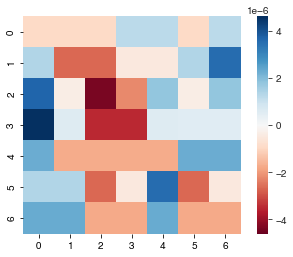

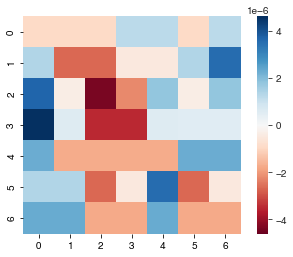

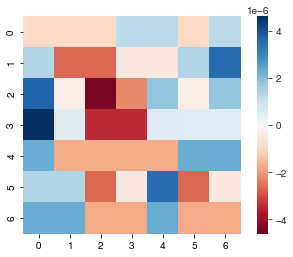

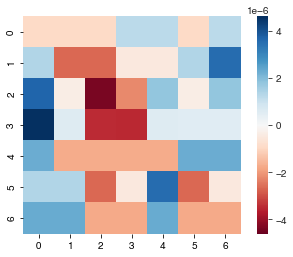

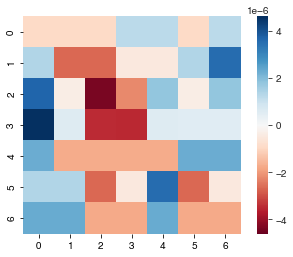

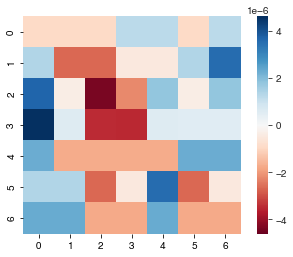

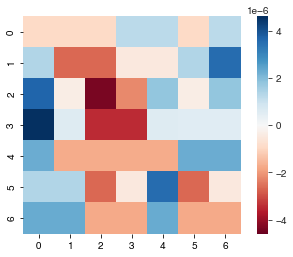

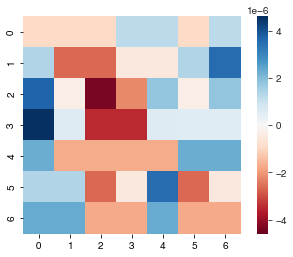

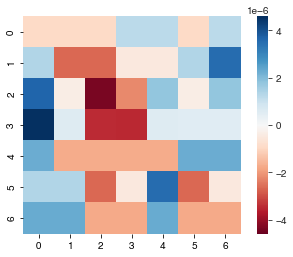

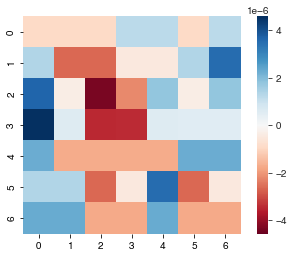

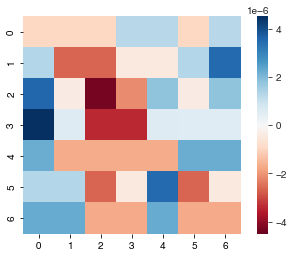

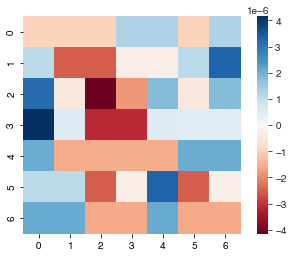

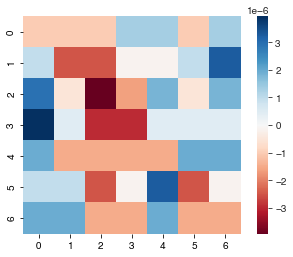

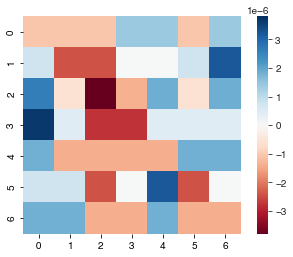

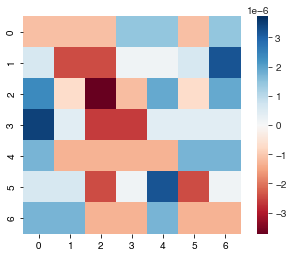

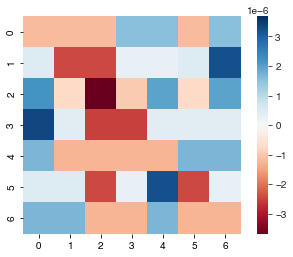

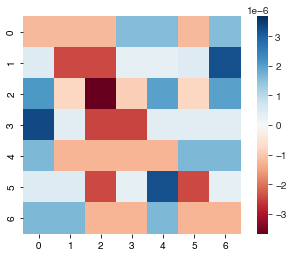

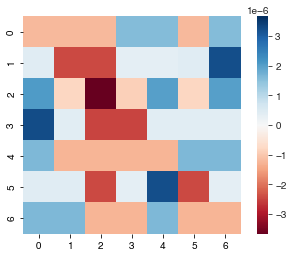

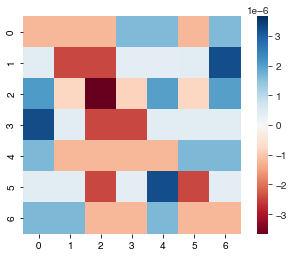

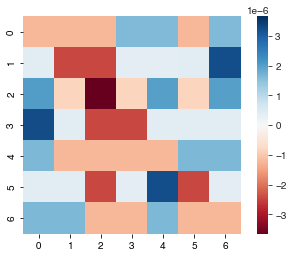

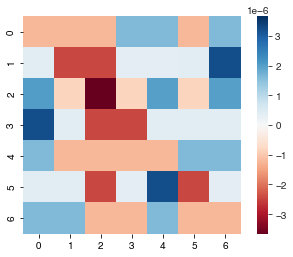

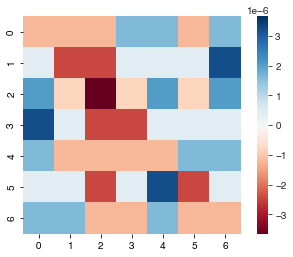

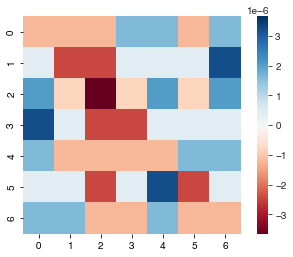

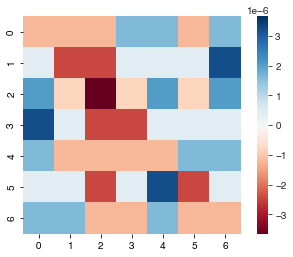

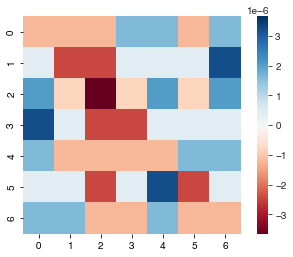

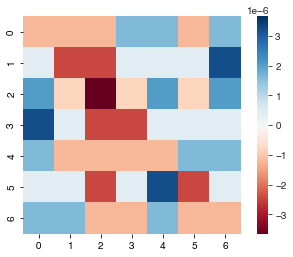

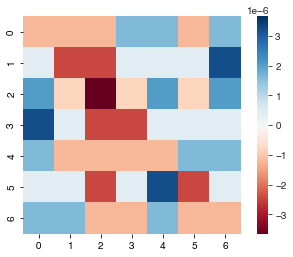

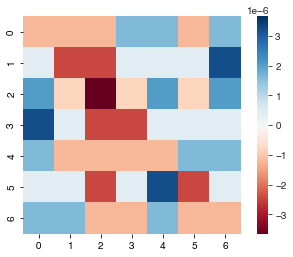

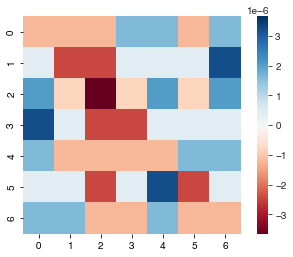

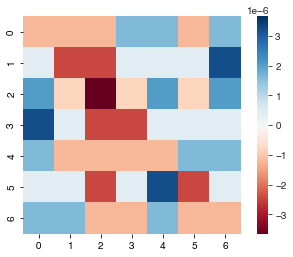

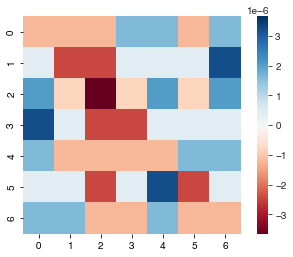

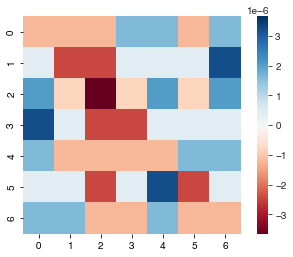

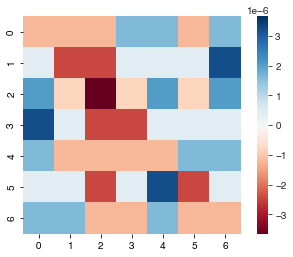

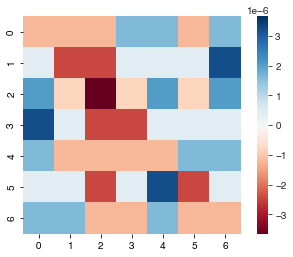

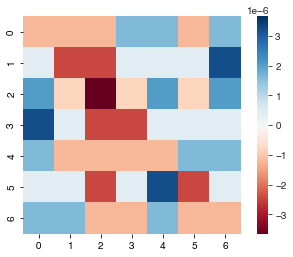

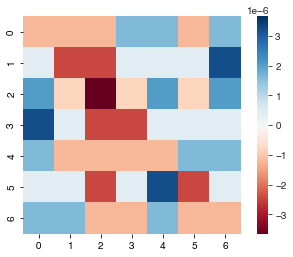

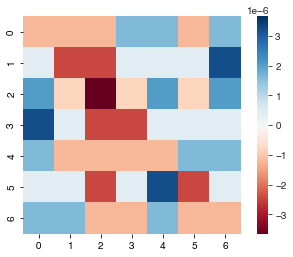

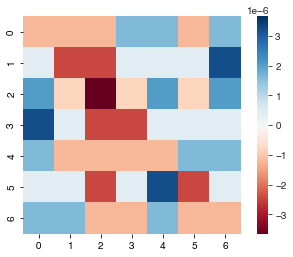

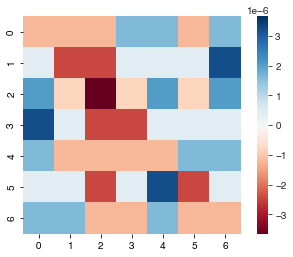

In [32]:
for t_idx, t_focal in enumerate(system.t_series):
    
    if(t_idx % 10 != 0):
        continue
    
    ds_dNi_rows = []

    for i in range(system.num_types):

        # print("\ni", i)

        abd = system.get_type_abundance(t=t_focal)
        r = system.get_fitness(t=t_focal)
        s = r - r.mean()
        # print(abd)
        # print(r)
        # print(s)

        abd_dN = np.array(abd)
        # abd_dN[i] *= 1.1
        abd_dN[i] += 1e5
        r_dN = system.get_fitness(t=t_focal, N=abd_dN)
        s_dN = r_dN - r_dN.mean()
        # print(abd_dN)
        # print(r_dN)
        # print(s_dN)

        dNi = abd_dN[i] - abd[i]
        ds = s_dN - s
        ds_dNi = ds#/dNi
        # print(dNi)
        # print(ds)
        # print(ds_dNi)

        ds_dNi_rows.append(ds_dNi)

        # break

    ds_dN = np.vstack(ds_dNi_rows)


    fig, ax = plt.subplots(1, 1)
    viz.matrix_plot(ds_dN, ax=ax)
    fig.savefig(f"./temp/dsdN_tidx{t_idx+1}.png")


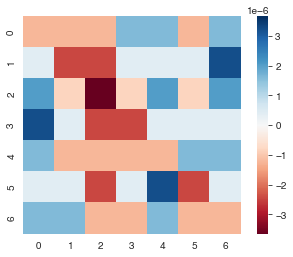

In [33]:
viz.matrix_plot(ds_dN)

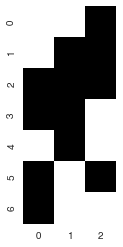

In [34]:
viz.matrix_plot(system.type_set.sigma)